In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pollutionFilepath = "./processedData/2025-03-30_10-22-15/pollution/pollution_df.pkl"


In [3]:
pollutionDf = pd.read_pickle(pollutionFilepath)
pollutionDf['datetime'] = pd.to_datetime(pollutionDf['datetime'])
pollutionDf = pollutionDf.sort_values(by='datetime')


In [4]:
pollutionDf.head(5)

,Id,T,H,FMHDS,PMS1,PMS2_5,PMS10,NO2,C2H5OH,VoC,CO,CO2,datetime
0,7,23.9,20.8,-1,45,129,203,135,190,230,107,65414,2024-11-29 13:31:22
1,5,24.6,23.3,-1,25,42,52,108,169,346,65,65414,2024-11-29 13:31:22
2,4,25.4,26.0,-1,65,185,266,164,44,59,122,65414,2024-11-29 13:31:22
3,10,25.5,19.1,-1,30,55,71,17,69,41,61,353,2024-11-29 13:31:22
4,2,26.2,24.1,-1,35,81,103,104,263,109,65,65414,2024-11-29 13:31:22


In [5]:
pollutionDf.shape

(46928, 13)

In [6]:
pollutionDfDay3 = pollutionDf[pollutionDf['datetime'].dt.date == pd.to_datetime('2024-12-02').date()]
pollutionDfDay3.sort_values(by='datetime')

,Id,T,H,FMHDS,PMS1,PMS2_5,PMS10,NO2,C2H5OH,VoC,CO,CO2,datetime
19376,1,17.8,68.4,-1,247,576,693,307,309,339,481,65535,2024-12-02 00:59:12
19377,1,20.1,60.2,-1,263,628,753,306,309,338,481,65414,2024-12-02 00:59:14
19378,1,20.1,60.2,-1,261,629,751,305,309,338,480,65414,2024-12-02 00:59:15
19379,1,20.1,60.2,-1,262,630,752,306,308,338,480,65414,2024-12-02 00:59:16
19380,10,18.4,68.6,-1,227,663,764,21,362,100,179,65535,2024-12-02 00:59:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35858,9,29.2,24.7,-1,80,165,199,12,16,42,93,323,2024-12-02 15:14:46
35861,9,29.2,24.7,-1,86,169,202,12,16,42,93,323,2024-12-02 15:14:47
35862,10,29.4,24.5,-1,44,101,123,15,30,17,55,233,2024-12-02 15:14:47
35860,1,28.4,28.7,-1,34,66,82,31,22,20,165,0,2024-12-02 15:14:47


In [7]:
pollutionDfDay3.shape

(16488, 13)

In [26]:
print(pollutionDfDay3['Id'].unique())

[ 1 10  2 11  9]


In [8]:
pollutionDfDay3ID1 = pollutionDfDay3[pollutionDfDay3['Id']==1]
pollutionDfDay3ID10 = pollutionDfDay3[pollutionDfDay3['Id']==10]
pollutionDfDay3ID2 = pollutionDfDay3[pollutionDfDay3['Id']==2]#no recorded data
pollutionDfDay3ID11 = pollutionDfDay3[pollutionDfDay3['Id']==11]
pollutionDfDay3ID9 = pollutionDfDay3[pollutionDfDay3['Id']==9]


In [9]:
print("pollutionDfDay3ID1.shape: ",pollutionDfDay3ID1.shape)
print("pollutionDfDay3ID10.shape: ",pollutionDfDay3ID10.shape)
print("pollutionDfDay3ID2.shape: ",pollutionDfDay3ID2.shape)
print("pollutionDfDay3ID11.shape: ",pollutionDfDay3ID11.shape)
print("pollutionDfDay3ID9.shape: ",pollutionDfDay3ID9.shape)

pollutionDfDay3ID1.shape:  (3936, 13)
pollutionDfDay3ID10.shape:  (4466, 13)
pollutionDfDay3ID2.shape:  (1, 13)
pollutionDfDay3ID11.shape:  (4226, 13)
pollutionDfDay3ID9.shape:  (3859, 13)


In [ ]:
df_mono_activity['datetime'].iloc[-1] #df_mono_activity['datetime'].iloc[0]

In [31]:
pollutionDf.columns

Index(['Id', 'T', 'H', 'FMHDS', 'PMS1', 'PMS2_5', 'PMS10', 'NO2', 'C2H5OH',
       'VoC', 'CO', 'CO2', 'datetime'],
      dtype='object')

# Grouping of data on Day3 ('2024-12-02')

In [10]:
import pandas as pd

def analyze_activities(df, df_name):
    activity_windows = [
        ('polishing',         '2024-12-02 13:03:16', '2024-12-02 14:04:57'),
        ('chipping',          '2024-12-02 14:05:45', '2024-12-02 14:15:45'),
        ('chipping_cutting',  '2024-12-02 14:16:30', '2024-12-02 14:36:38'),
        ('grinding',          '2024-12-02 14:37:44', '2024-12-02 14:57:52'),
        ('grinding_chipping', '2024-12-02 14:57:59', '2024-12-02 15:07:59'),
    ]
    activity_dfs = {}
    activity_stats = {}
    
    print(f"\n--- Results for {df_name} ---")
    
    for name, start, end in activity_windows:
        start_time = pd.to_datetime(start)
        end_time = pd.to_datetime(end)
        filtered_df = df[(df['datetime'] >= start_time) & (df['datetime'] <= end_time)]
        activity_dfs[name] = filtered_df
        if not filtered_df.empty:
            duration = filtered_df.iloc[-1]['datetime'] - filtered_df.iloc[0]['datetime']
            duration_minutes = int(round(duration.total_seconds() / 60, 0))
        else:
            duration_minutes = 0
            
        activity_stats[name] = {
            'row_count': filtered_df.shape[0],
            'duration_minutes': duration_minutes
        }
        
        print(f"{name}: {filtered_df.shape[0]} rows, {duration_minutes} minutes")
    
    return {'dataframes': activity_dfs, 'stats': activity_stats}
dataframes = {
    'pollutionDfDay3ID1': pollutionDfDay3ID1,
    'pollutionDfDay3ID2': pollutionDfDay3ID2, 
    'pollutionDfDay3ID9': pollutionDfDay3ID9,
    'pollutionDfDay3ID10': pollutionDfDay3ID10,
    'pollutionDfDay3ID11': pollutionDfDay3ID11
}

results = {}
for df_name, df in dataframes.items():
    results[df_name] = analyze_activities(df, df_name)

# To get the polishing dataframe for ID10:
# polishing_df_id10 = results['pollutionDfDay3ID10']['dataframes']['polishing']

summary_data = []
for df_name in dataframes.keys():
    for activity, stats in results[df_name]['stats'].items():
        summary_data.append({
            'sensor_id': df_name,
            'activity': activity,
            'row_count': stats['row_count'],
            'duration_minutes': stats['duration_minutes']
        })

summary_df = pd.DataFrame(summary_data)
print("\n--- Summary of all activities across sensors ---")
print(summary_df)



--- Results for pollutionDfDay3ID1 ---
polishing: 1317 rows, 51 minutes
chipping: 323 rows, 9 minutes
chipping_cutting: 635 rows, 20 minutes
grinding: 325 rows, 11 minutes
grinding_chipping: 249 rows, 8 minutes

--- Results for pollutionDfDay3ID2 ---
polishing: 0 rows, 0 minutes
chipping: 0 rows, 0 minutes
chipping_cutting: 0 rows, 0 minutes
grinding: 0 rows, 0 minutes
grinding_chipping: 0 rows, 0 minutes

--- Results for pollutionDfDay3ID9 ---
polishing: 1293 rows, 51 minutes
chipping: 318 rows, 9 minutes
chipping_cutting: 756 rows, 20 minutes
grinding: 558 rows, 14 minutes
grinding_chipping: 221 rows, 6 minutes

--- Results for pollutionDfDay3ID10 ---
polishing: 1325 rows, 51 minutes
chipping: 317 rows, 9 minutes
chipping_cutting: 713 rows, 20 minutes
grinding: 686 rows, 20 minutes
grinding_chipping: 396 rows, 10 minutes

--- Results for pollutionDfDay3ID11 ---
polishing: 1268 rows, 51 minutes
chipping: 95 rows, 2 minutes
chipping_cutting: 692 rows, 17 minutes
grinding: 797 rows, 20

In [39]:
summary_df

,sensor_id,activity,row_count,duration_minutes
0,pollutionDfDay3ID1,polishing,1317,51
1,pollutionDfDay3ID1,chipping,323,9
2,pollutionDfDay3ID1,chipping_cutting,635,20
3,pollutionDfDay3ID1,grinding,325,11
4,pollutionDfDay3ID1,grinding_chipping,249,8
5,pollutionDfDay3ID2,polishing,0,0
6,pollutionDfDay3ID2,chipping,0,0
7,pollutionDfDay3ID2,chipping_cutting,0,0
8,pollutionDfDay3ID2,grinding,0,0
9,pollutionDfDay3ID2,grinding_chipping,0,0


In [37]:
polishing_df_id10 = results['pollutionDfDay3ID10']['dataframes']['polishing']
polishing_df_id10.head()

,Id,T,H,FMHDS,PMS1,PMS2_5,PMS10,NO2,C2H5OH,VoC,CO,CO2,datetime
22626,10,31.2,22.3,-1,30,51,64,14,24,15,54,258,2024-12-02 13:13:28
22628,10,31.2,22.7,-1,31,52,65,15,24,15,53,258,2024-12-02 13:13:29
22630,10,31.2,22.9,-1,31,53,66,14,24,15,54,258,2024-12-02 13:13:31
22632,10,31.1,23.0,-1,31,53,66,15,24,15,54,258,2024-12-02 13:13:32
22635,10,31.1,23.1,-1,31,52,66,14,24,15,53,259,2024-12-02 13:13:34


[np.int64(51), np.int64(9), np.int64(20), np.int64(11), np.int64(8)]
[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
[np.int64(51), np.int64(9), np.int64(20), np.int64(14), np.int64(6)]
[np.int64(51), np.int64(9), np.int64(20), np.int64(20), np.int64(10)]
[np.int64(51), np.int64(2), np.int64(17), np.int64(20), np.int64(10)]


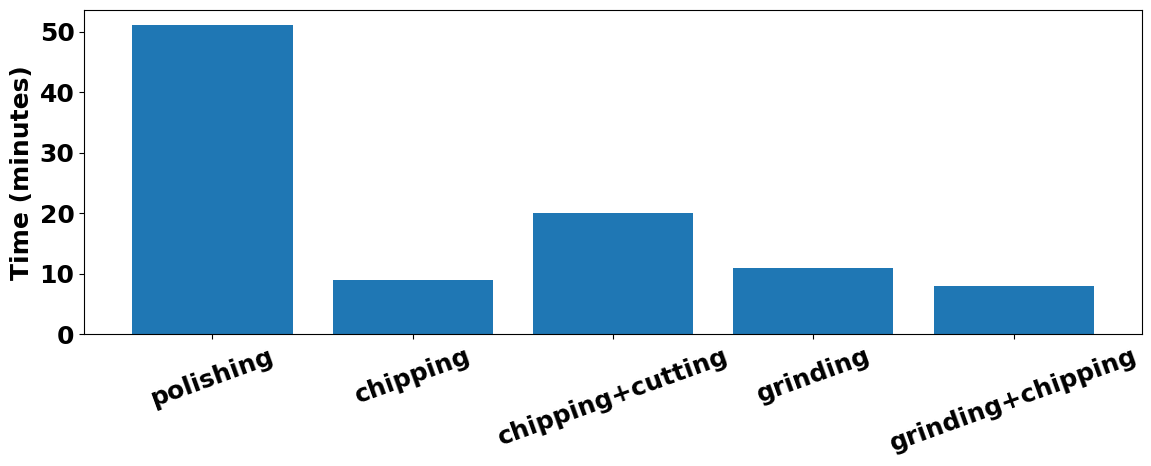

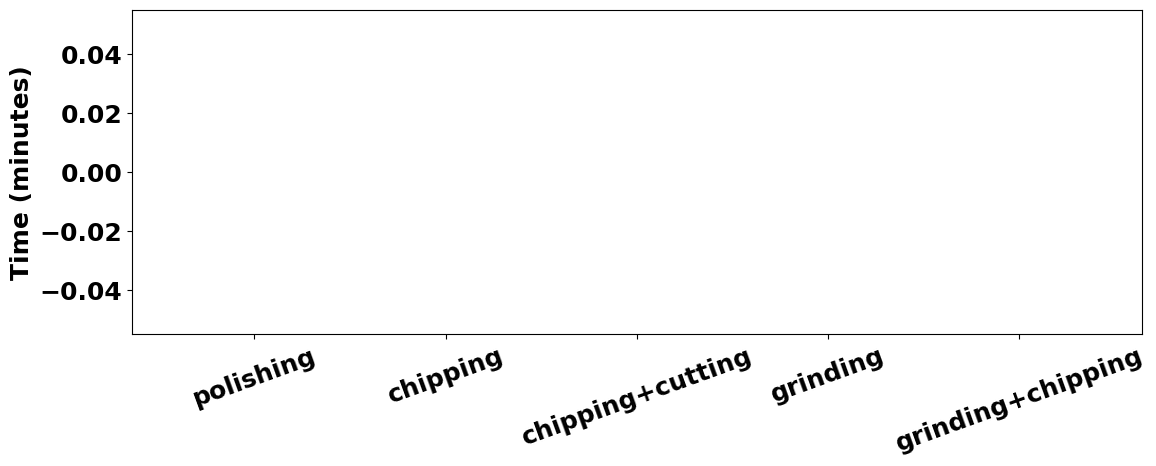

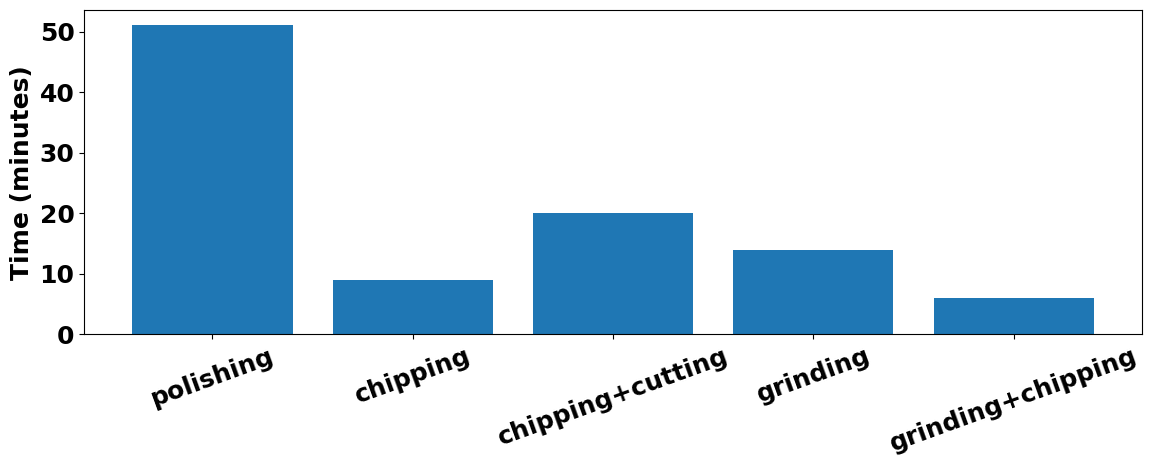

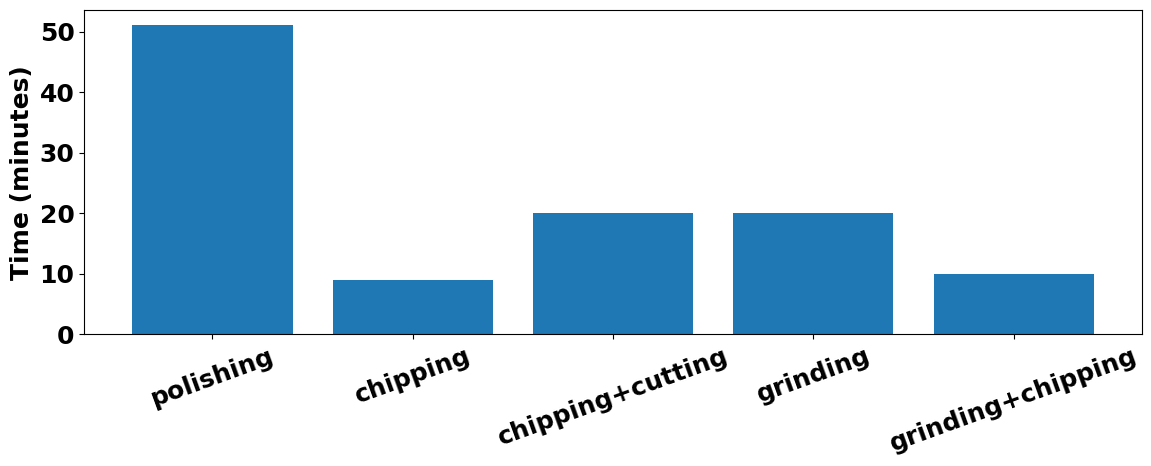

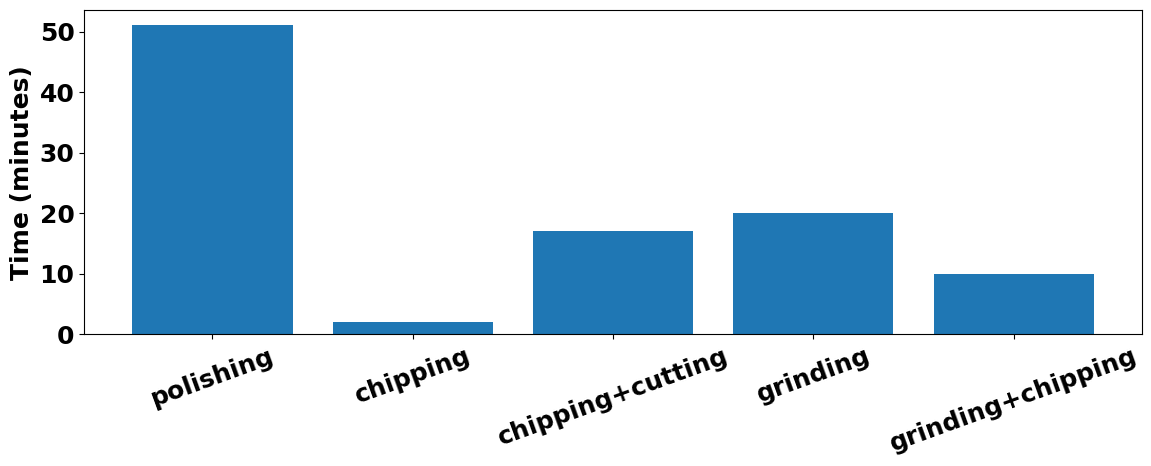

In [ ]:
for df_name in dataframes.keys():
    polishing_time = summary_df[(summary_df['sensor_id'] == df_name) & 
                           (summary_df['activity'] == 'polishing')]['duration_minutes'].values[0]

    chipping_time = summary_df[(summary_df['sensor_id'] == df_name) & 
                          (summary_df['activity'] == 'chipping')]['duration_minutes'].values[0]
    chipping_cutting_time = summary_df[(summary_df['sensor_id'] == df_name) & 
                          (summary_df['activity'] == 'chipping_cutting')]['duration_minutes'].values[0]
    grinding_time = summary_df[(summary_df['sensor_id'] == df_name) & 
                          (summary_df['activity'] == 'grinding')]['duration_minutes'].values[0]
    grinding_chipping_time = summary_df[(summary_df['sensor_id'] == df_name) & 
                          (summary_df['activity'] == 'grinding_chipping')]['duration_minutes'].values[0]


    activity_time=[polishing_time,chipping_time,chipping_cutting_time,grinding_time,grinding_chipping_time ]

    print(activity_time)
    activity_list = ['polishing','chipping' ,'chipping+cutting', 'grinding', 'grinding+chipping']
    plt.figure(figsize=(12, 5))
    plt.bar(activity_list, activity_time)
    plt.ylabel('Time (minutes)')
    plt.xticks(rotation=20) 
    plt.tight_layout()
    file_name=f'./processedData/2025-03-30_10-22-15/pollution/plot/activityTime/{df_name}.png'
    plt.savefig(file_name)
    # plt.show()
                 

In [66]:
results['pollutionDfDay3ID10']['dataframes']['polishing']['datetime'].empty

False

/tmp/ipykernel_2377070/3732957334.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[pollutants] = pd.to_numeric(df[pollutants], errors='coerce')
/tmp/ipykernel_2377070/3732957334.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'activity'] = activity
/tmp/ipykernel_2377070/3732957334.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

pollutionDfDay3ID2


/tmp/ipykernel_2377070/3732957334.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[pollutants] = pd.to_numeric(df[pollutants], errors='coerce')
/tmp/ipykernel_2377070/3732957334.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[pollutants] = pd.to_numeric(df[pollutants], errors='coerce')
/tmp/ipykernel_2377070/3732957334.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

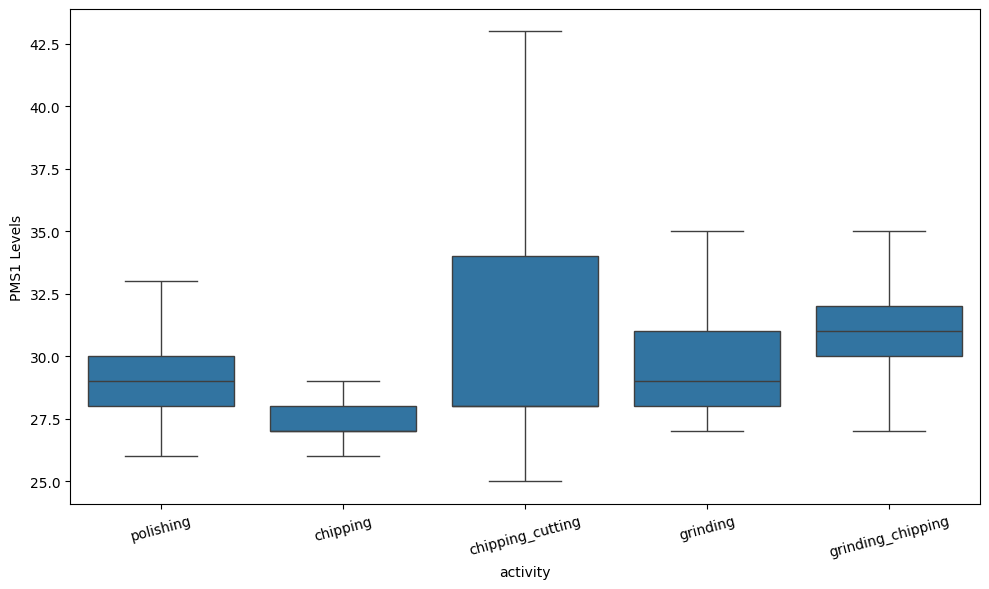

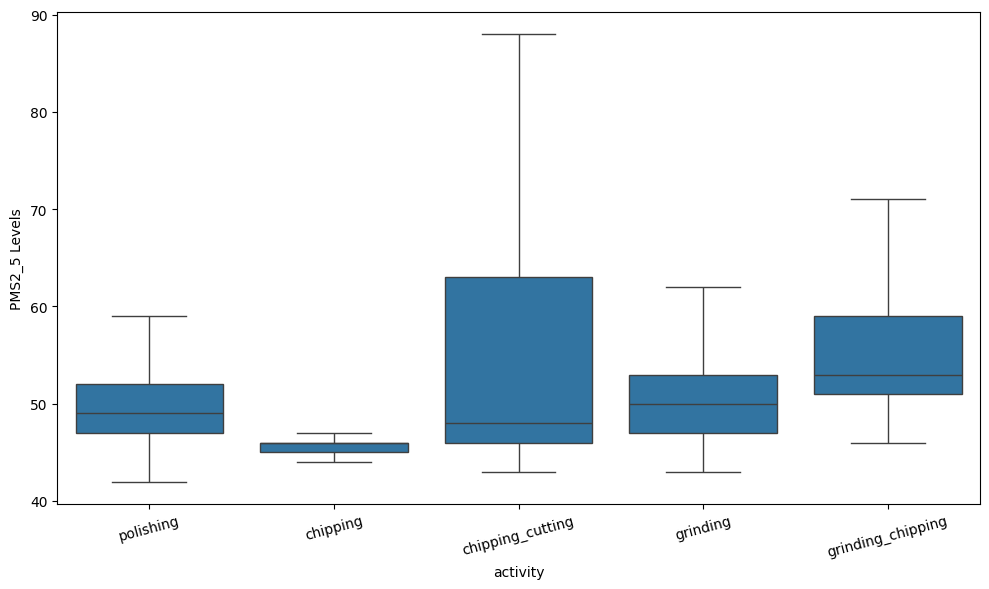

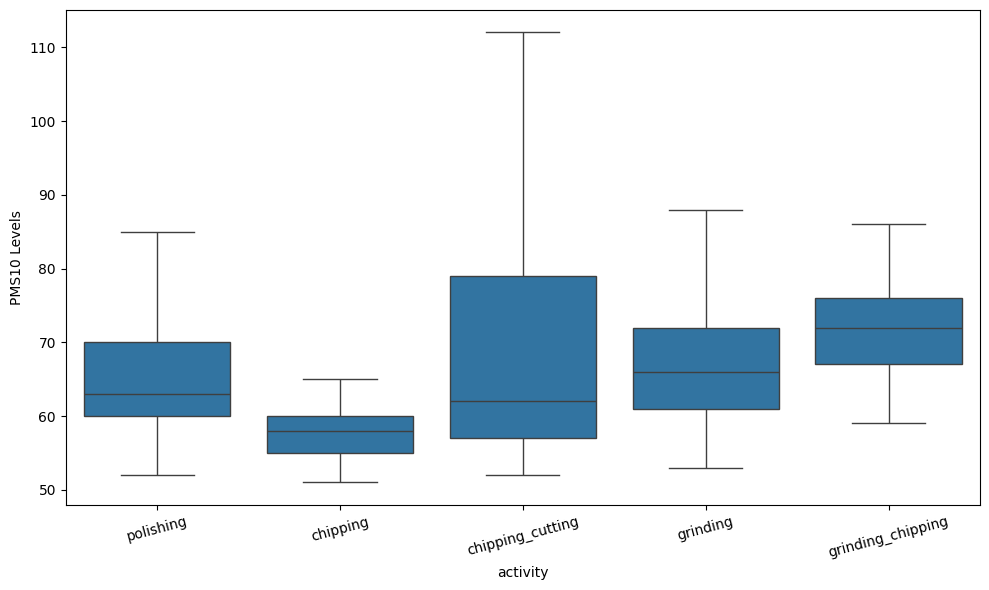

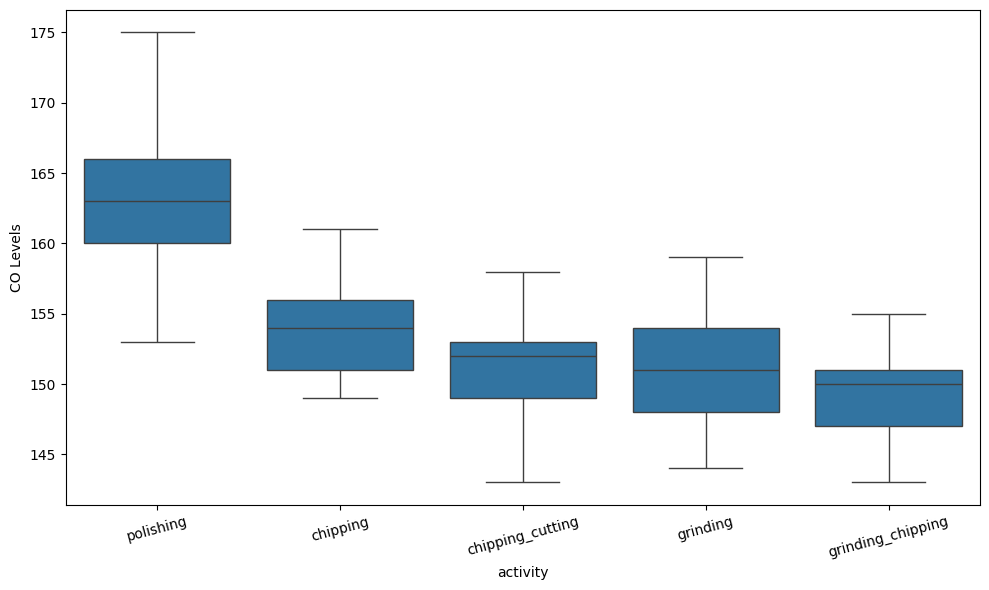

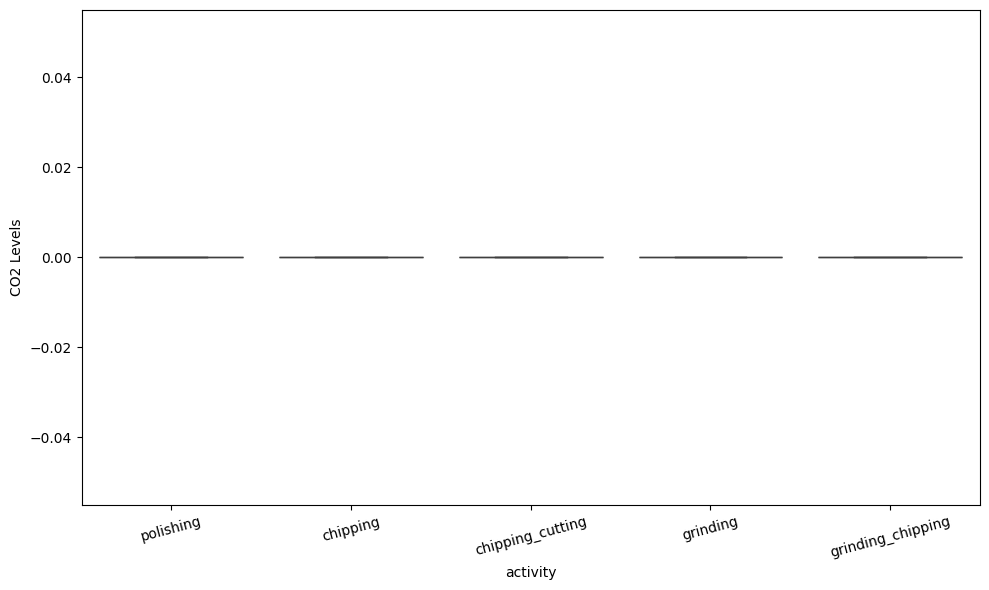

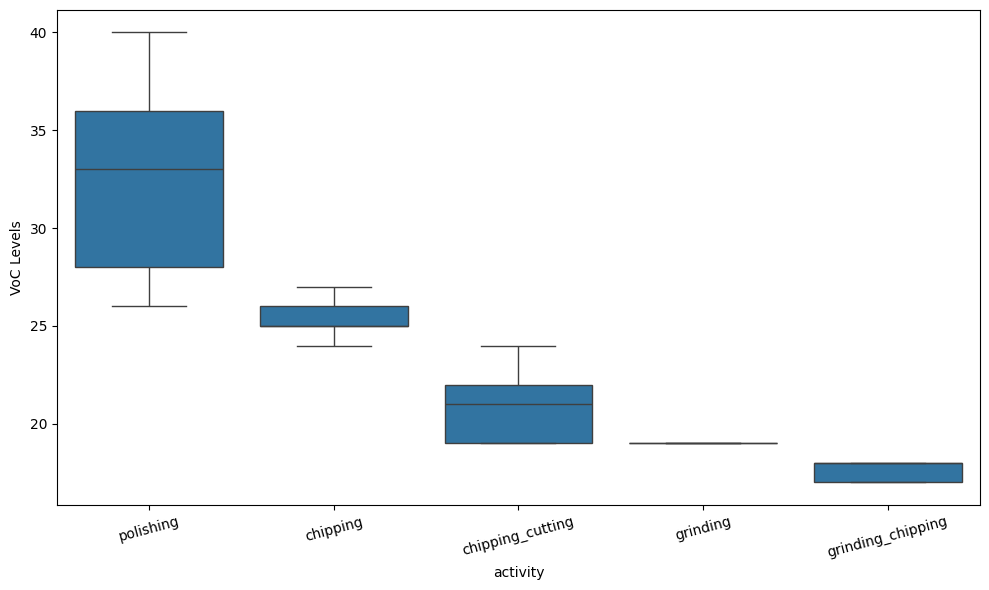

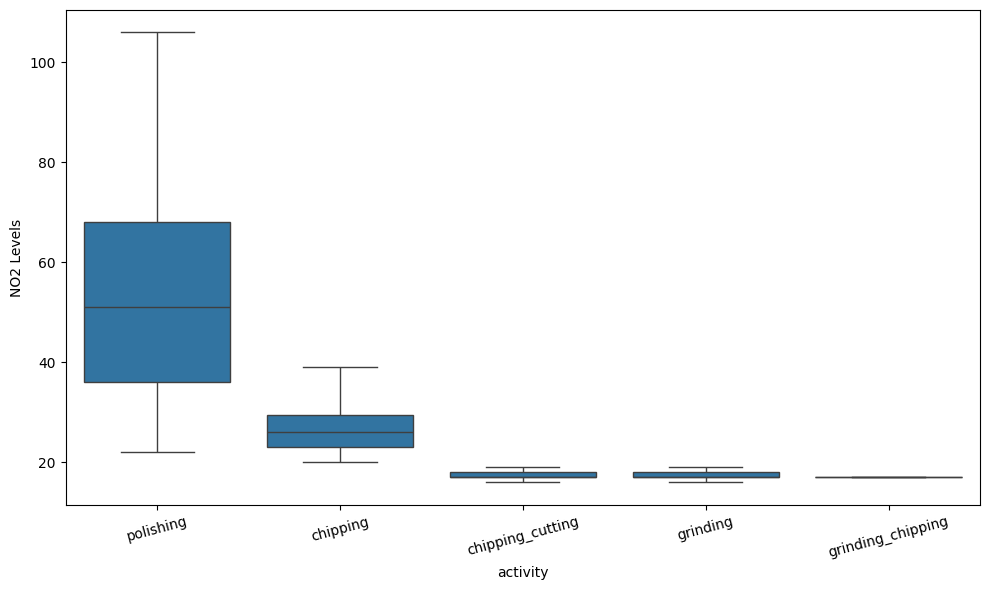

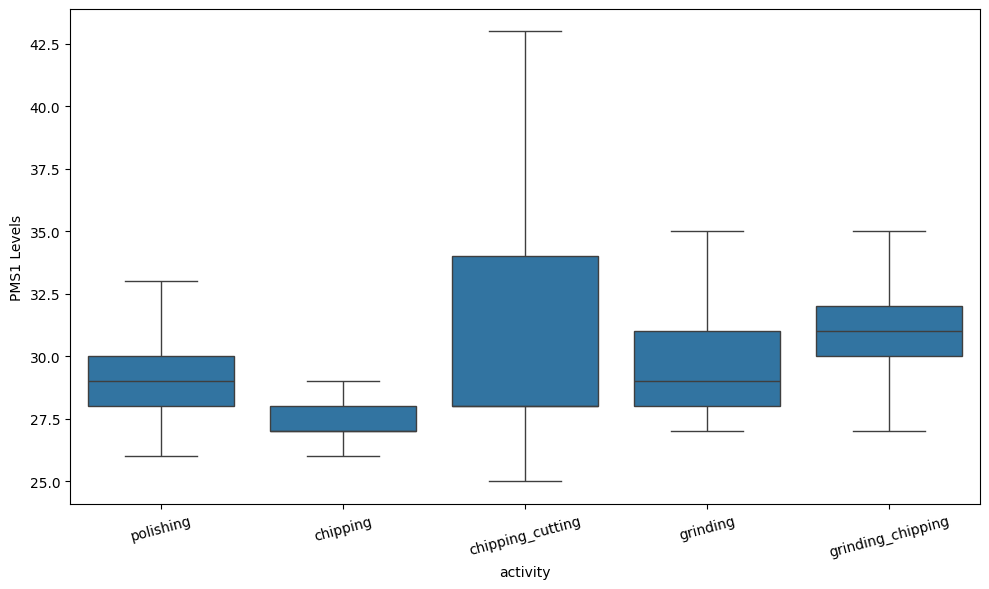

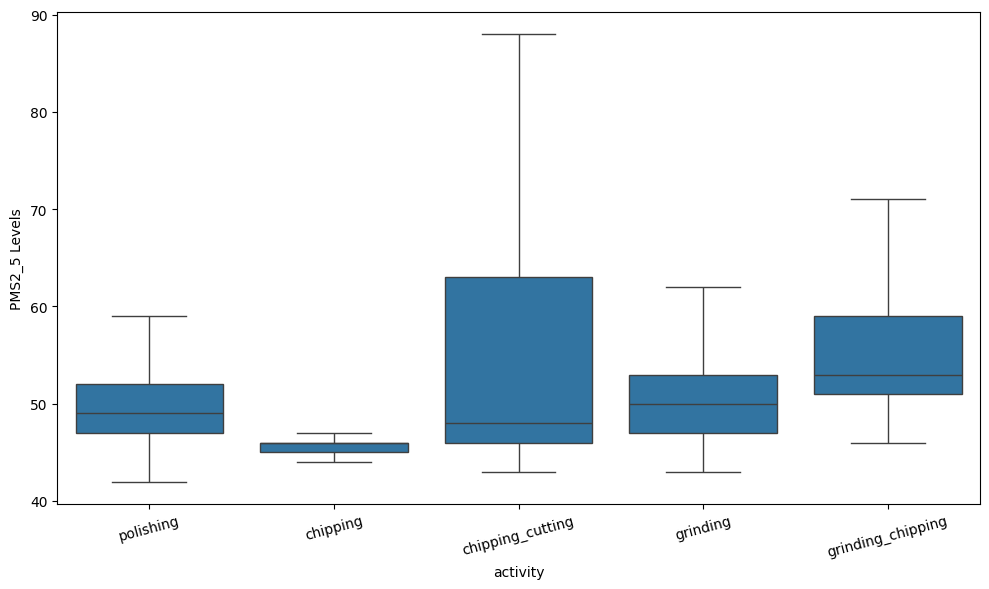

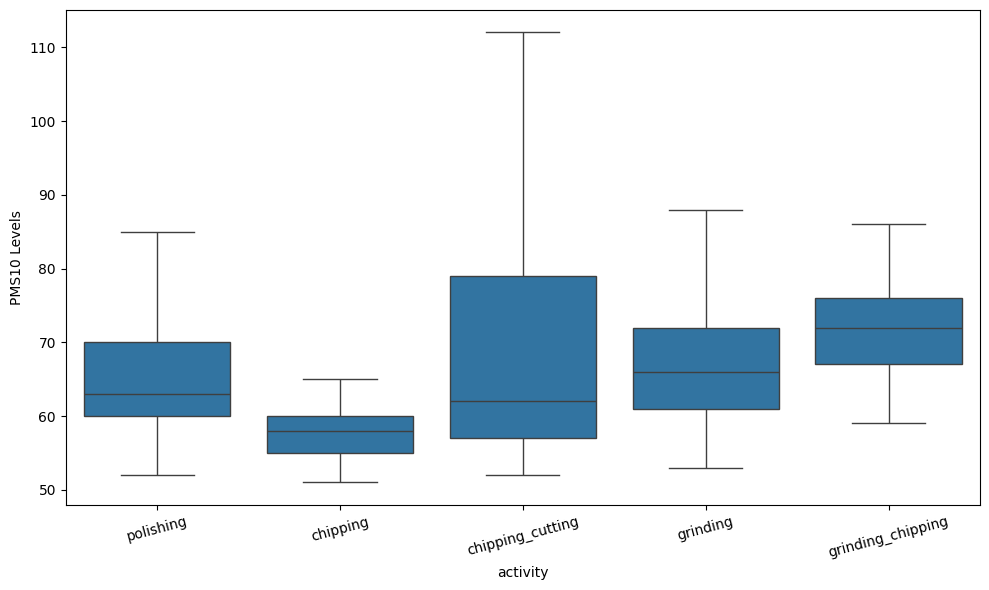

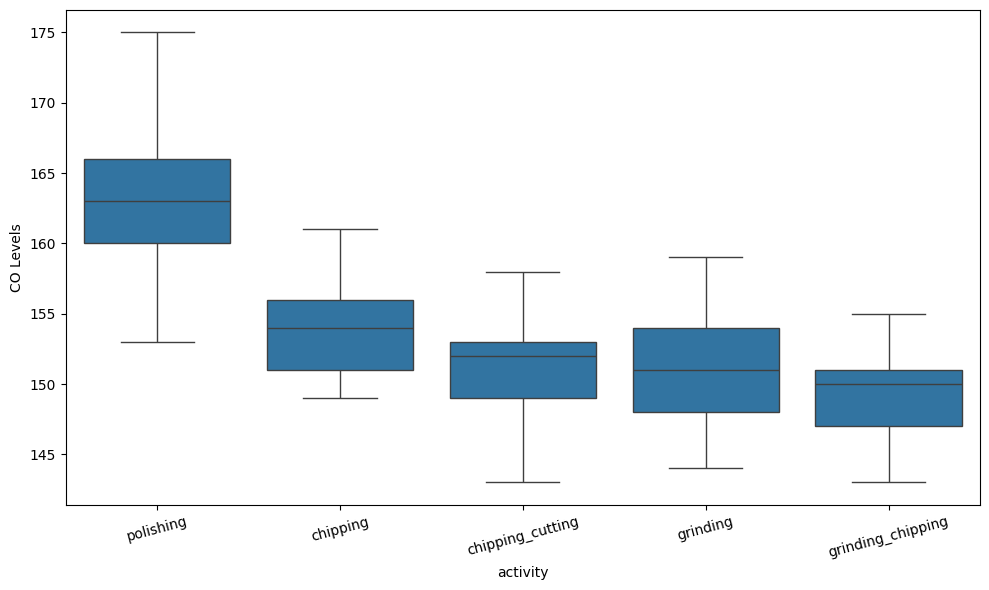

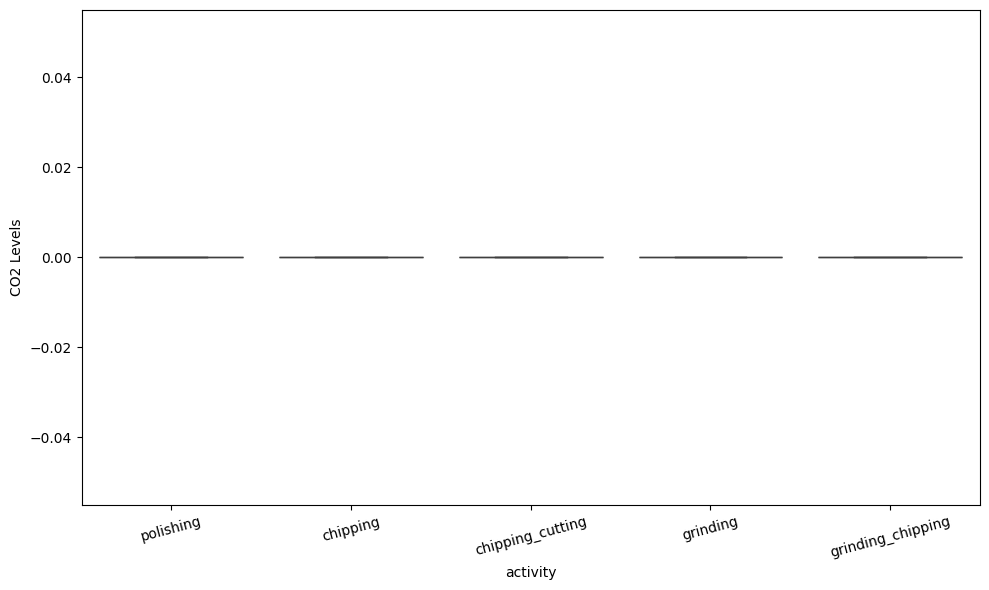

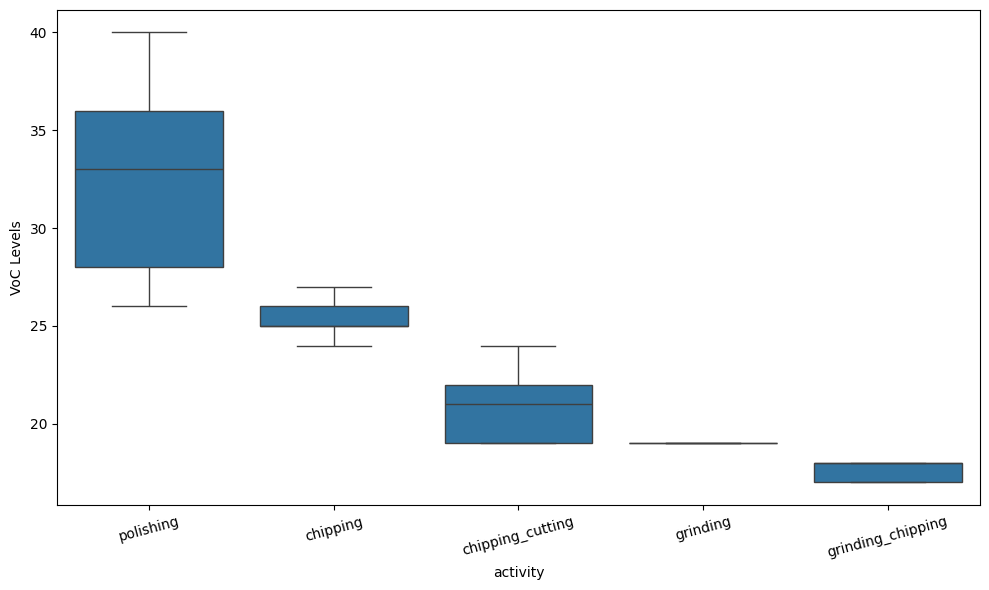

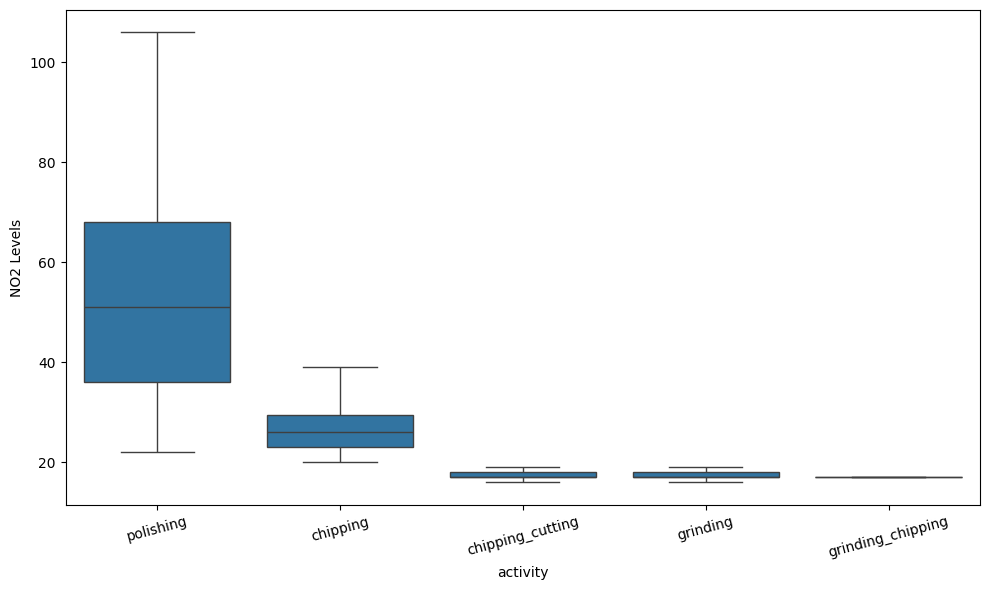

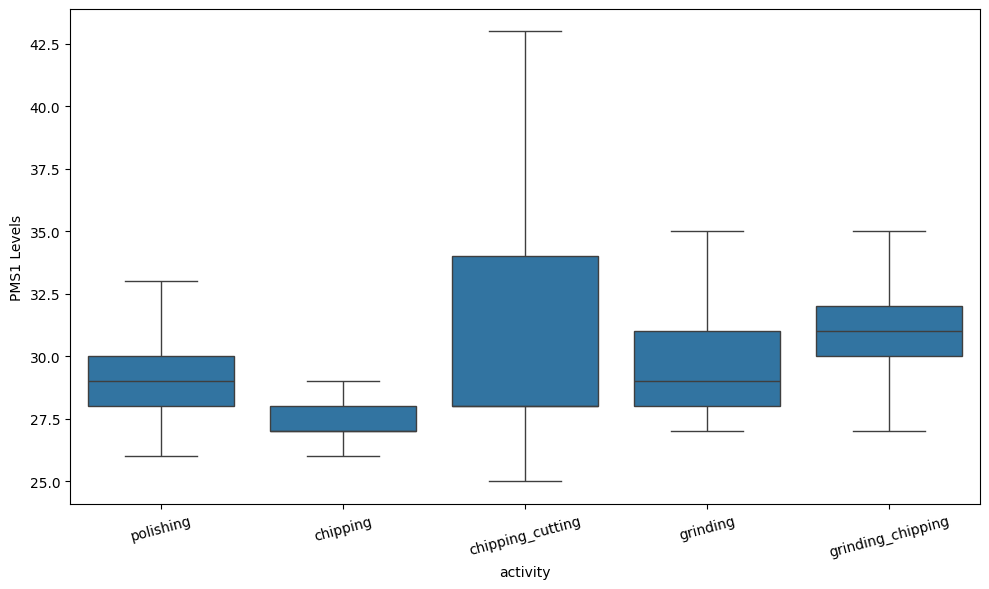

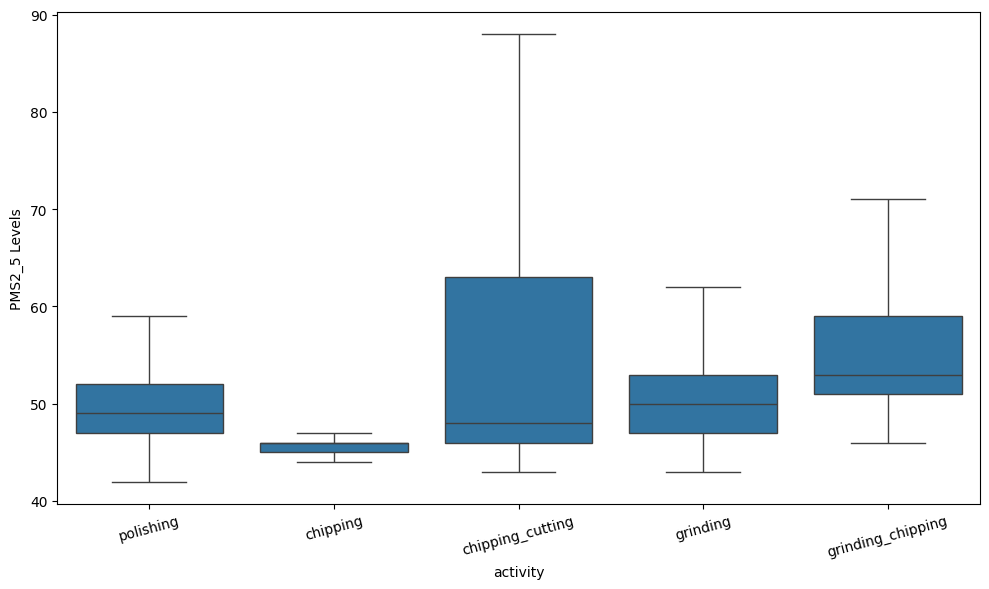

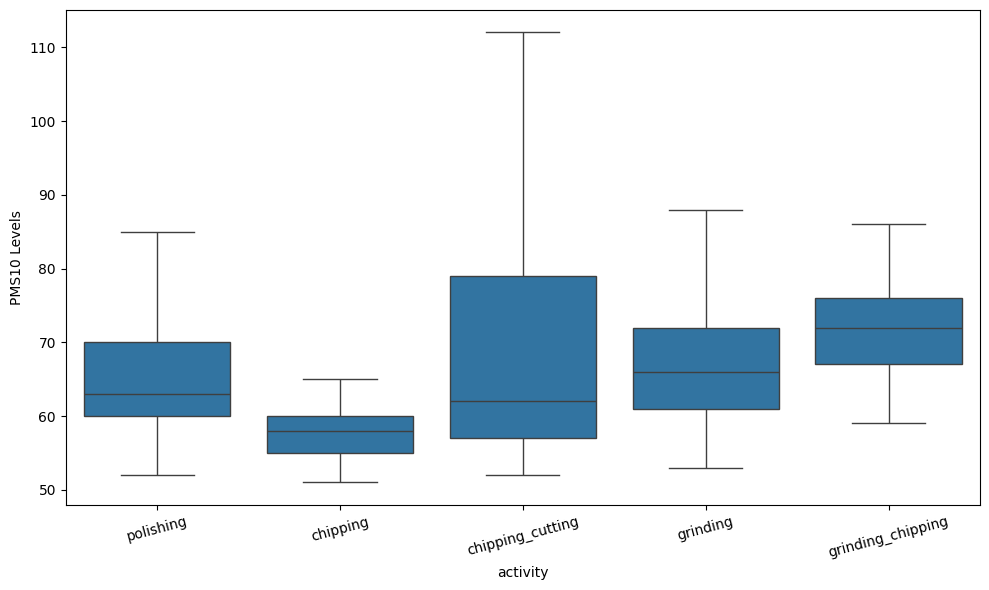

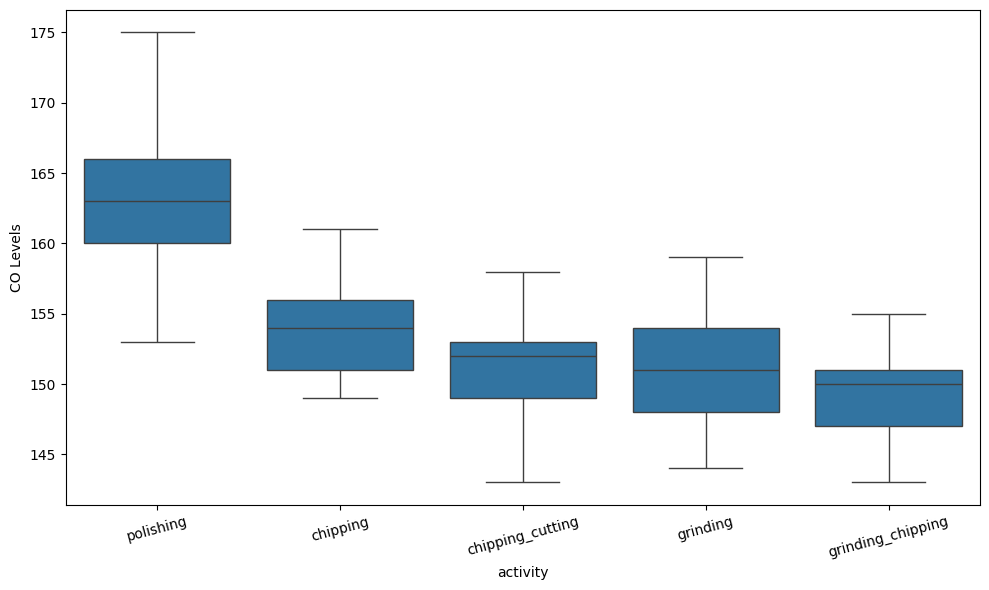

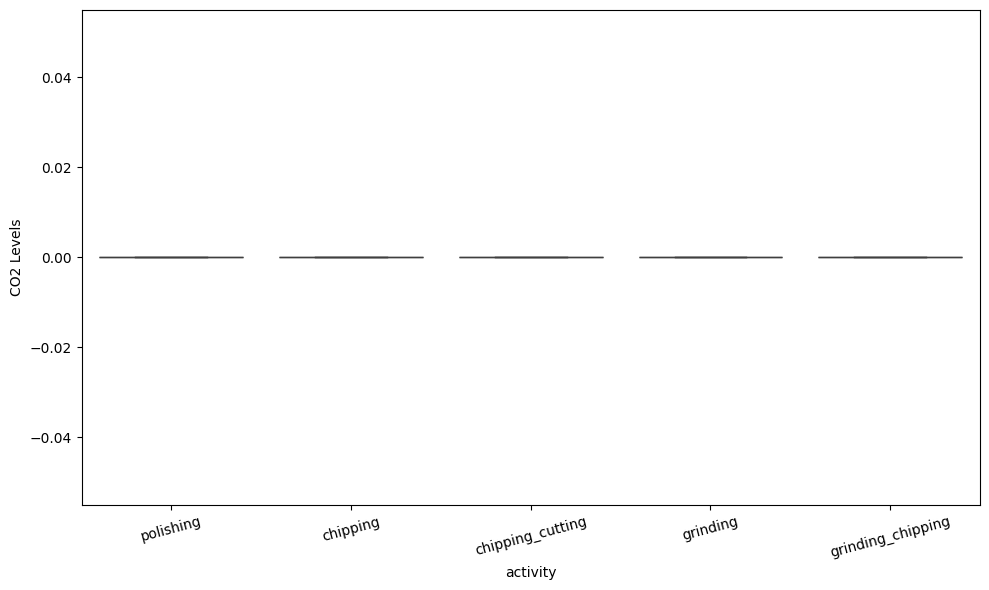

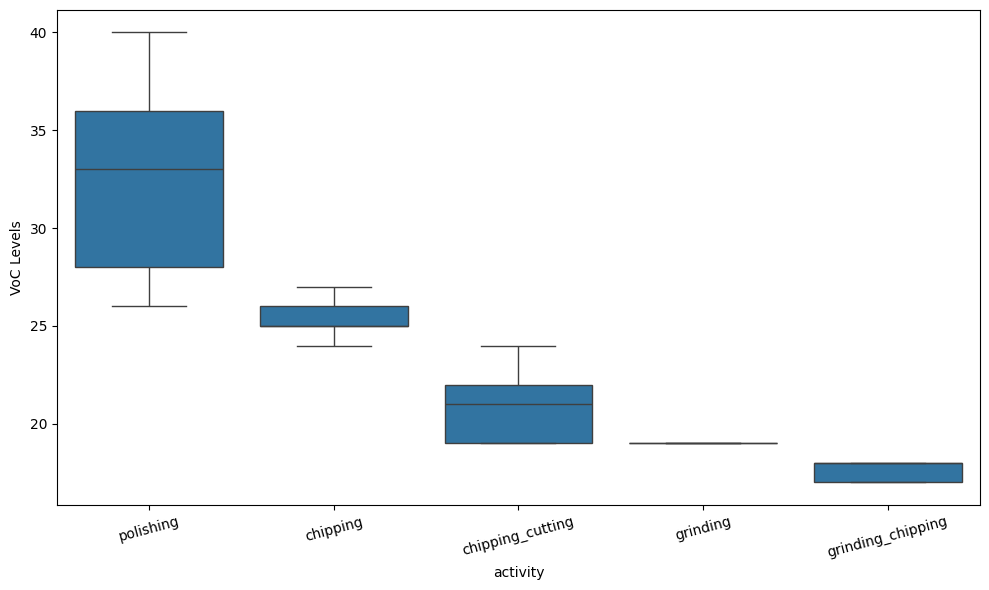

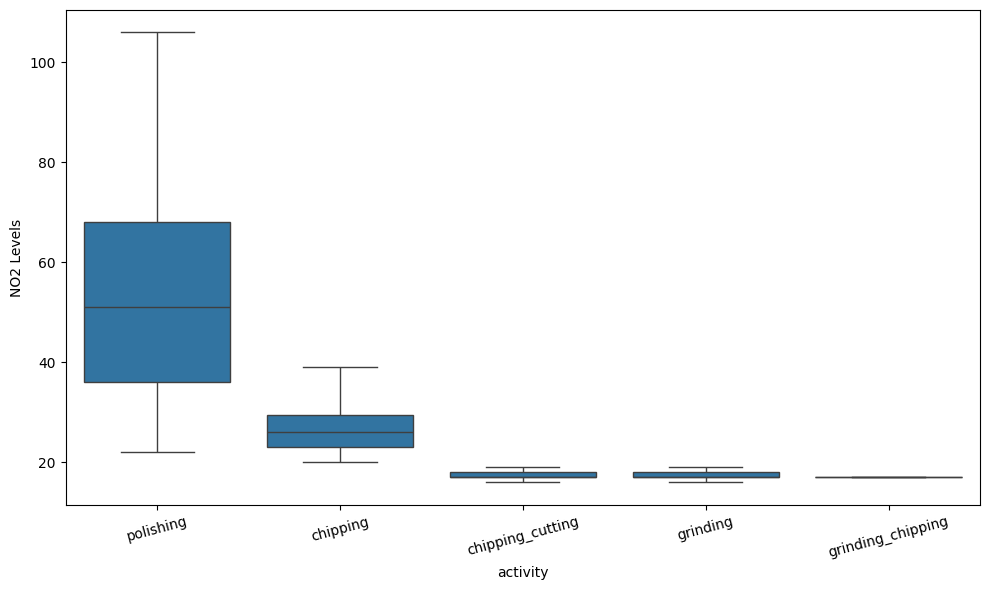

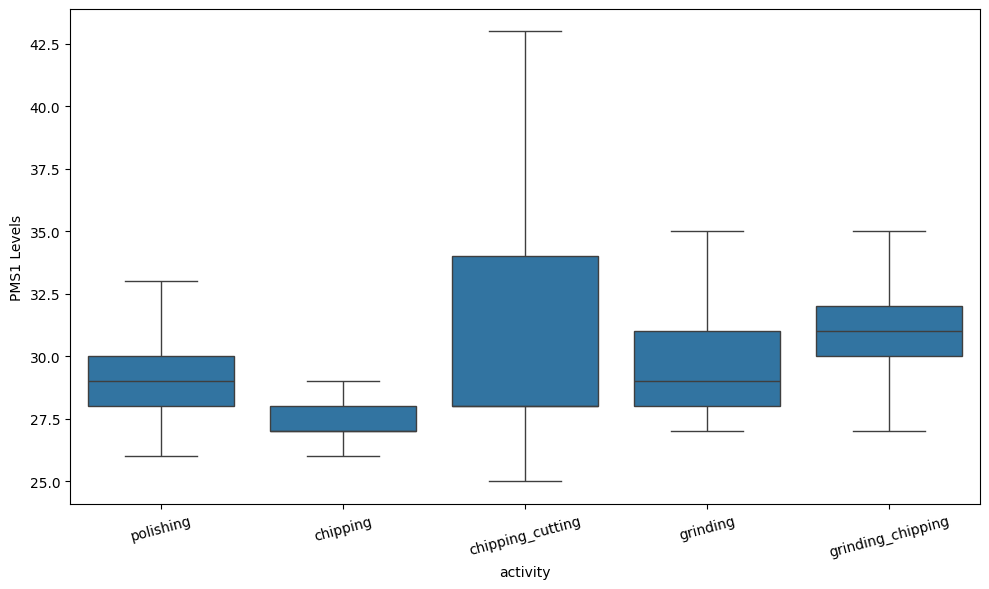

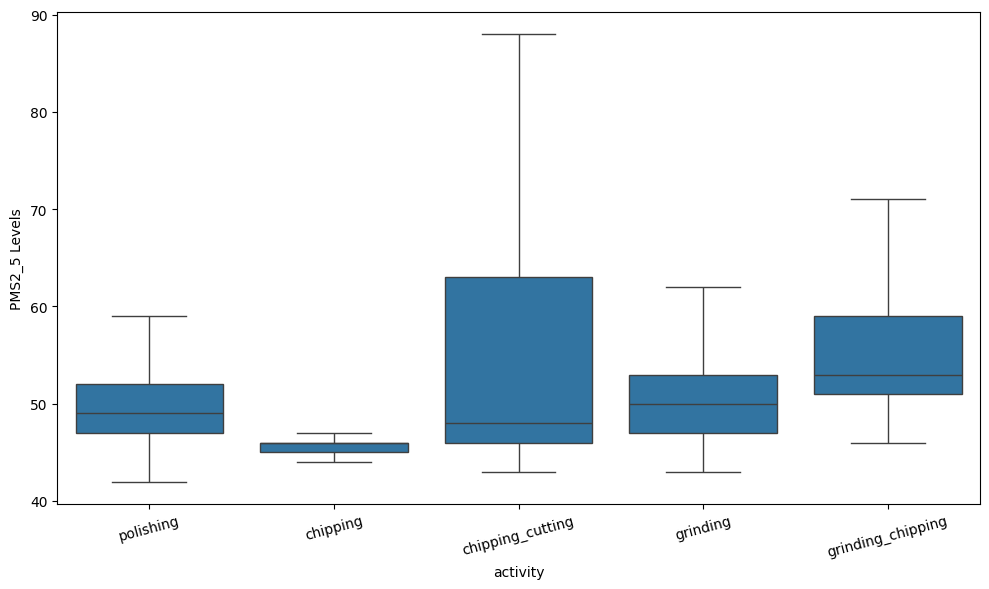

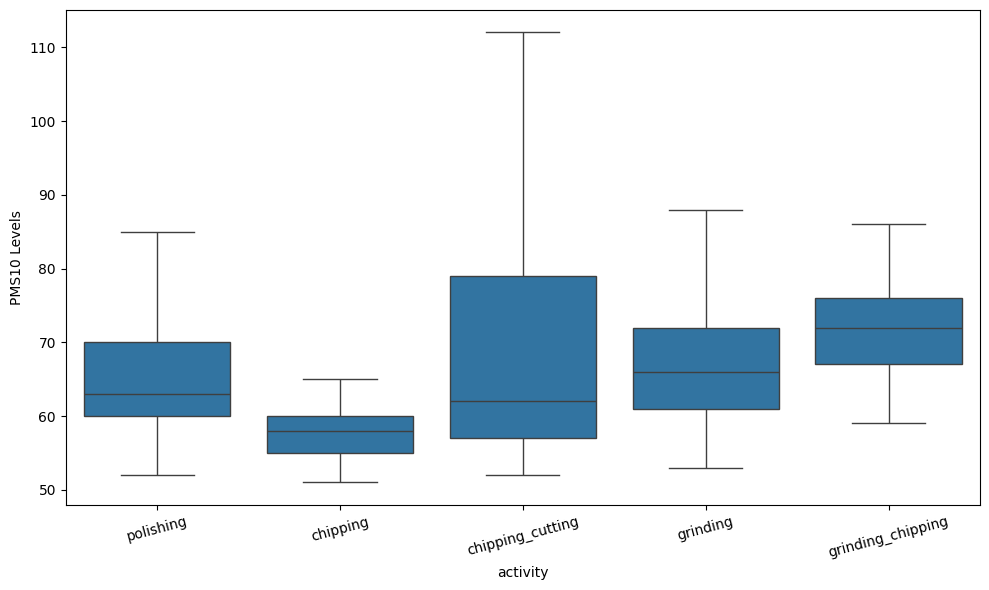

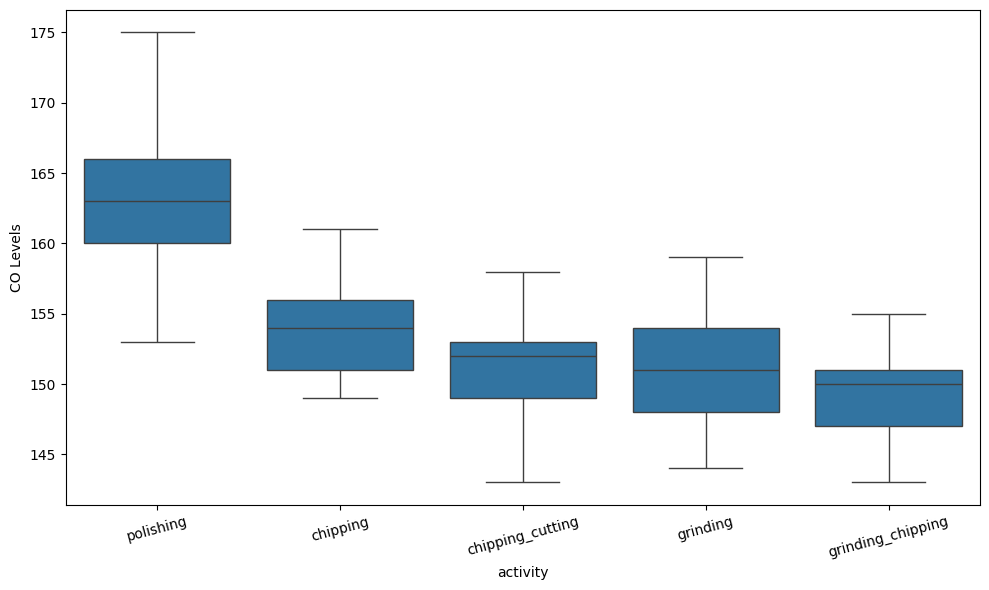

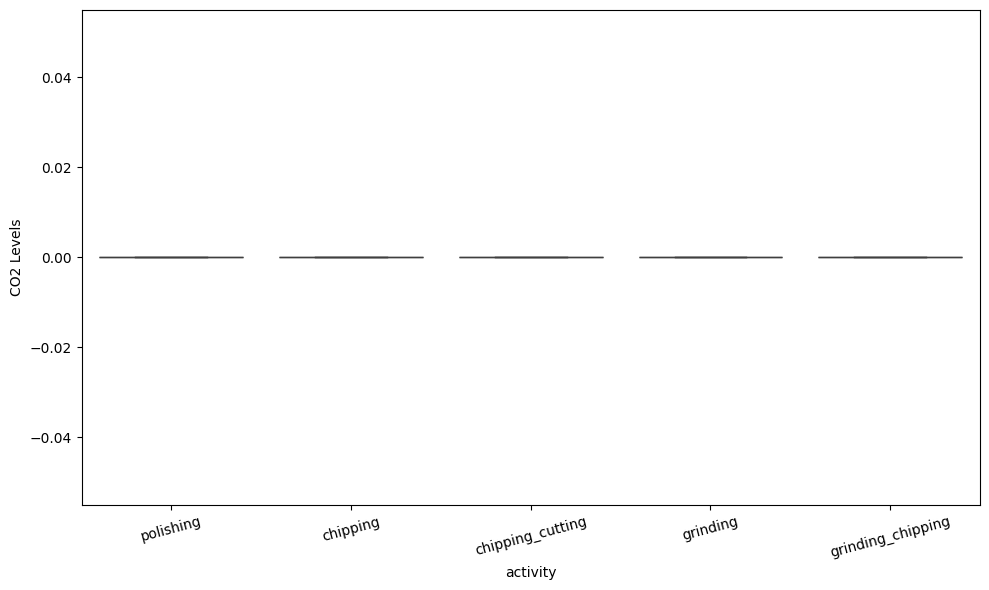

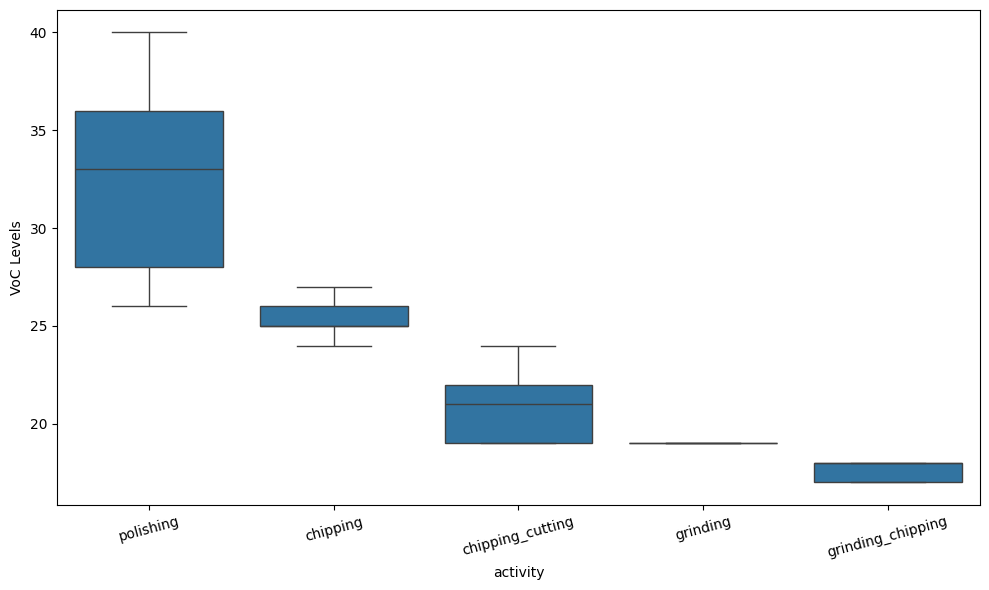

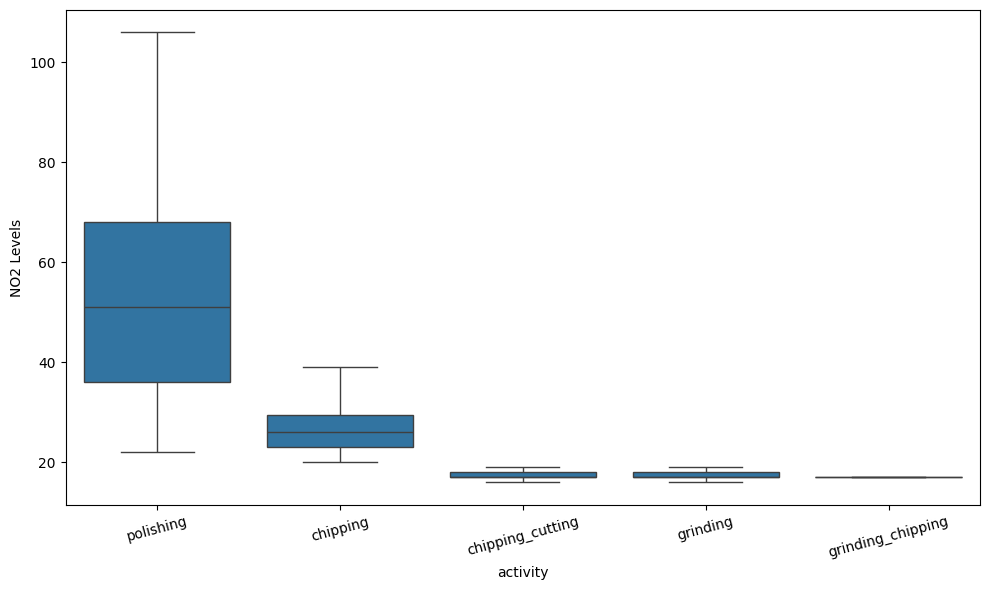

In [11]:
activity_list = ['polishing','chipping', 'chipping_cutting', 'grinding', 'grinding_chipping']
window_list = []
for df_name in dataframes.keys():
    if results[df_name]['dataframes']['polishing']['datetime'].empty:
        print(df_name)
        continue
    for activity in activity_list:
        window_list.append(results[df_name]['dataframes'][activity])
    pollution_list= ['PMS1', 'PMS2_5', 'PMS10', 'CO', 'CO2', 'VoC', 'NO2' ]
    dfs = []
    for pollutants in pollution_list:
        for activity, df in zip(activity_list, window_list):
            df[pollutants] = pd.to_numeric(df[pollutants], errors='coerce')  
            # df['activity'] = activity  
            df.loc[:, 'activity'] = activity

            dfs.append(df[[pollutants, 'activity']])  

    df_combined = pd.concat(dfs, ignore_index=True)

    for pollutants in pollution_list:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='activity', y=pollutants, data=df_combined, showfliers=False)
        plt.ylabel(f"{pollutants} Levels")
        plt.xticks(rotation=15)
        fig_name = f'./processedData/2025-03-30_10-22-15/pollution/plot/pollutant/{df_name}_{pollutants}.png'
        plt.tight_layout()
        plt.savefig(fig_name)



In [28]:
start_time = pd.to_datetime('2024-12-02 13:03:16')
end_time = pd.to_datetime('2024-12-02 14:04:57')
df_mono_activity_id_10_polishing = df_mono_activity_id_10[(df_mono_activity_id_10['datetime'] >= start_time) & (df_mono_activity_id_10['datetime'] <= end_time)] 
# df_mono_activity_id_10_polishing
s_t=df_mono_activity_id_10_polishing.iloc[0]['datetime']
e_t=df_mono_activity_id_10_polishing.iloc[-1]['datetime']
polishing_time = e_t-s_t
print(polishing_time)



start_time = pd.to_datetime('2024-12-02 14:05:45')
end_time = pd.to_datetime('2024-12-02 14:15:45')
df_mono_activity_id_10_chipping = df_mono_activity_id_10[(df_mono_activity_id_10['datetime'] >= start_time) & (df_mono_activity_id_10['datetime'] <= end_time)] 
# df_mono_activity_id_10_chipping
s_t=df_mono_activity_id_10_chipping.iloc[0]['datetime']
e_t=df_mono_activity_id_10_chipping.iloc[-1]['datetime']
chipping_time = e_t-s_t
print(chipping_time)

start_time = pd.to_datetime('2024-12-02 14:16:30')
end_time = pd.to_datetime('2024-12-02 14:36:38')
df_mono_activity_id_10_chipping_cutting = df_mono_activity_id_10[(df_mono_activity_id_10['datetime'] >= start_time) & (df_mono_activity_id_10['datetime'] <= end_time)] 
# df_mono_activity_id_10_chipping_cutting
s_t=df_mono_activity_id_10_chipping_cutting.iloc[0]['datetime']
e_t=df_mono_activity_id_10_chipping_cutting.iloc[-1]['datetime']
chipping_cutting_time = e_t-s_t
print(chipping_cutting_time)

start_time = pd.to_datetime('2024-12-02 14:37:44')
end_time = pd.to_datetime('2024-12-02 14:57:52')
df_mono_activity_id_10_grinding = df_mono_activity_id_10[(df_mono_activity_id_10['datetime'] >= start_time) & (df_mono_activity_id_10['datetime'] <= end_time)] 
# df_mono_activity_id_10_grinding
s_t=df_mono_activity_id_10_grinding.iloc[0]['datetime']
e_t=df_mono_activity_id_10_grinding.iloc[-1]['datetime']
grinding_time = e_t-s_t
print(grinding_time)

start_time = pd.to_datetime('2024-12-02 14:57:59')
end_time = pd.to_datetime('2024-12-02 15:07:59')
chipping2_time = end_time-start_time
df_mono_activity_id_10_chipping2 = df_mono_activity_id_10[(df_mono_activity_id_10['datetime'] >= start_time) & (df_mono_activity_id_10['datetime'] <= end_time)] 
# df_mono_activity_id_10_chipping
s_t=df_mono_activity_id_10_chipping2.iloc[0]['datetime']
e_t=df_mono_activity_id_10_chipping2.iloc[-1]['datetime']
chipping2_time = e_t-s_t
print(chipping2_time)

0 days 00:51:28
0 days 00:08:42
0 days 00:20:07
0 days 00:20:07
0 days 00:09:59


### bar plot for activity time

In [ ]:
activity_time=[polishing_time,chipping_time,chipping_cutting_time,grinding_time,chipping2_time ]
activity_time_minutes = [int(np.round(td.total_seconds() / 60,0)) for td in activity_time]

print(activity_time_minutes)

activity_list = ['polishing','chipping' ,'chipping+cutting', 'grinding', 'grinding+chipping']

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(activity_list, activity_time_minutes)


plt.ylabel('Time (minutes)')
plt.xticks(rotation=20) 
plt.tight_layout()
file_name='node_10_and_1_activity_time.png'
plt.savefig(file_name)

plt.show()

In [ ]:
window_list=[df_mono_activity_id_10_polishing, df_mono_activity_id_10_chipping, df_mono_activity_id_10_chipping_cutting, 
              df_mono_activity_id_10_grinding,df_mono_activity_id_10_chipping2]
activity_list = ['polishing','chipping', 'chipping+cutting', 'grinding', 'grinding+chipping']
dfs = []
pollution_list= ['PMS1', 'PMS2_5', 'PMS10', 'CO', 'CO2', 'VoC', 'NO2' ]
for pollutants in pollution_list:
    for activity, df in zip(activity_list, window_list):
        df[pollutants] = pd.to_numeric(df[pollutants], errors='coerce')  
        df['activity'] = activity  
        dfs.append(df[[pollutants, 'activity']])  

df_combined = pd.concat(dfs, ignore_index=True)

for pollutants in pollution_list:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='activity', y=pollutants, data=df_combined, showfliers=False)
    plt.ylabel(f"{pollutants} Levels")
    plt.xticks(rotation=15)
    fig_name = f'box_plt_{pollutants}_id_10'
    plt.tight_layout()
    plt.savefig(fig_name)
    
    # plt.show()

### grouping of data on '2024-12-02' and seperate it by dalton Id = 1

In [ ]:
start_time = pd.to_datetime('2024-12-02 13:03:16')
end_time = pd.to_datetime('2024-12-02 14:04:57')
df_mono_activity_id_1_polishing = df_mono_activity_id_1[(df_mono_activity_id_1['datetime'] >= start_time) & (df_mono_activity_id_1['datetime'] <= end_time)] 
print(df_mono_activity_id_1_polishing.shape)

start_time = pd.to_datetime('2024-12-02 14:05:45')
end_time = pd.to_datetime('2024-12-02 14:15:45')
df_mono_activity_id_1_chipping = df_mono_activity_id_1[(df_mono_activity_id_1['datetime'] >= start_time) & (df_mono_activity_id_1['datetime'] <= end_time)] 
print(df_mono_activity_id_1_chipping.shape)

start_time = pd.to_datetime('2024-12-02 14:16:30')
end_time = pd.to_datetime('2024-12-02 14:36:38')
df_mono_activity_id_1_chipping_cutting = df_mono_activity_id_1[(df_mono_activity_id_1['datetime'] >= start_time) & (df_mono_activity_id_1['datetime'] <= end_time)] 
print(df_mono_activity_id_1_chipping_cutting.shape)

start_time = pd.to_datetime('2024-12-02 14:37:44')
end_time = pd.to_datetime('2024-12-02 14:57:52')
df_mono_activity_id_1_grinding = df_mono_activity_id_1[(df_mono_activity_id_1['datetime'] >= start_time) & (df_mono_activity_id_1['datetime'] <= end_time)] 
print(df_mono_activity_id_1_grinding.shape)

start_time = pd.to_datetime('2024-12-02 14:57:59')
end_time = pd.to_datetime('2024-12-02 15:07:59')
df_mono_activity_id_1_chipping2 = df_mono_activity_id_1[(df_mono_activity_id_1['datetime'] >= start_time) & (df_mono_activity_id_1['datetime'] <= end_time)] 
print(df_mono_activity_id_1_chipping.shape)

In [ ]:
window_list=[df_mono_activity_id_1_polishing, df_mono_activity_id_1_chipping, df_mono_activity_id_1_chipping_cutting, 
              df_mono_activity_id_1_grinding,df_mono_activity_id_1_chipping2]
activity_list = ['polishing','chipping','chipping+cutting', 'grinding', 'grinding+chipping']
dfs = []
pollution_list= ['PMS1', 'PMS2_5', 'PMS10', 'CO', 'CO2','VoC', 'NO2' ]
for pollutants in pollution_list:
    for activity, df in zip(activity_list, window_list):
        df[pollutants] = pd.to_numeric(df[pollutants], errors='coerce')  
        df['activity'] = activity  
        dfs.append(df[[pollutants, 'activity']])  

df_combined = pd.concat(dfs, ignore_index=True)

for pollutants in pollution_list:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='activity', y=pollutants, data=df_combined, showfliers=False)
    plt.ylabel(f"{pollutants} Levels")
    plt.xticks(rotation=15)
    fig_name = f'box_plt_{pollutants}_id_1'
    plt.tight_layout()
    plt.savefig(fig_name)
    
    # plt.show()

### grouping of data on '2024-12-02' and seperate it by dalton Id = 9 

In [ ]:
# cutting
start_time = pd.to_datetime('2024-12-02 12:23:17')
end_time = pd.to_datetime('2024-12-02 12:33:17')
df_mono_activity_id_9_cutting = df_mono_activity_id_9[(df_mono_activity_id_9['datetime'] >= start_time) & (df_mono_activity_id_9['datetime'] <= end_time)] 
s_t=df_mono_activity_id_9_cutting.iloc[0]['datetime']
e_t=df_mono_activity_id_9_cutting.iloc[-1]['datetime']
cutting_time = e_t-s_t
print(cutting_time)

# polishing
start_time = pd.to_datetime('2024-12-02 13:03:48')
end_time = pd.to_datetime('2024-12-02 14:06:11')

df_mono_activity_id_9_polishing = df_mono_activity_id_9[(df_mono_activity_id_9['datetime'] >= start_time) & (df_mono_activity_id_9['datetime'] <= end_time)] 
# print(df_mono_activity_id_9_polishing.shape)
s_t=df_mono_activity_id_9_polishing.iloc[0]['datetime']
e_t=df_mono_activity_id_9_polishing.iloc[-1]['datetime']
polishing_time = e_t-s_t
print(polishing_time)


# no_activity
start_time = pd.to_datetime('2024-12-02 14:06:11')
end_time = pd.to_datetime('2024-12-02 14:11:42')

df_mono_activity_id_9_no_activity = df_mono_activity_id_9[(df_mono_activity_id_9['datetime'] >= start_time) & (df_mono_activity_id_9['datetime'] <= end_time)] 
# print(df_mono_activity_id_9_no_activity.shape)
s_t=df_mono_activity_id_9_no_activity.iloc[0]['datetime']
e_t=df_mono_activity_id_9_no_activity.iloc[-1]['datetime']
no_activity_time = e_t-s_t
print(no_activity_time)

# grinding
start_time = pd.to_datetime('2024-12-02 14:11:59')
end_time = pd.to_datetime('2024-12-02 14:39:09')
df_mono_activity_id_9_grinding = df_mono_activity_id_9[(df_mono_activity_id_9['datetime'] >= start_time) & (df_mono_activity_id_9['datetime'] <= end_time)] 
# print(df_mono_activity_id_9_grinding.shape)
s_t=df_mono_activity_id_9_grinding.iloc[0]['datetime']
e_t=df_mono_activity_id_9_grinding.iloc[-1]['datetime']
grinding_time = e_t-s_t
print(grinding_time)

# cutting
start_time = pd.to_datetime('2024-12-02 14:42:22')
end_time = pd.to_datetime('2024-12-02 14:52:12')
df_mono_activity_id_9_cutting2 = df_mono_activity_id_9[(df_mono_activity_id_9['datetime'] >= start_time) & (df_mono_activity_id_9['datetime'] <= end_time)] 
print(df_mono_activity_id_9_cutting2.shape)
s_t=df_mono_activity_id_9_cutting2.iloc[0]['datetime']
e_t=df_mono_activity_id_9_cutting2.iloc[-1]['datetime']
cutting_time2 = e_t-s_t
print(cutting_time2)

# multiactivity
start_time = pd.to_datetime('2024-12-02 14:52:22')
end_time = pd.to_datetime('2024-12-02 15:02:22')
df_mono_activity_id_9_multi = df_mono_activity_id_9[(df_mono_activity_id_9['datetime'] >= start_time) & (df_mono_activity_id_9['datetime'] <= end_time)] 
# print(df_mono_activity_id_9_multi.shape)
s_t=df_mono_activity_id_9_multi.iloc[0]['datetime']
e_t=df_mono_activity_id_9_multi.iloc[-1]['datetime']
multiactivity_time = e_t-s_t
print(multiactivity_time)



### bar plot for activity time

In [ ]:
activity_time=[cutting_time, polishing_time, no_activity_time, grinding_time, cutting_time2, multiactivity_time ]
activity_time_minutes = [int(np.round(td.total_seconds() / 60,0)) for td in activity_time]

print(activity_time_minutes)
activity_list = ['cutting(1)', 'polishing', 'no activity','grinding', 'cutting(2)', 'multi activity']

plt.figure(figsize=(8, 5))
plt.bar(activity_list, activity_time_minutes)


plt.ylabel('Time (minutes)')
plt.xticks(rotation=20) 
plt.tight_layout()
file_name='node_11_and_9_activity_time.png'
plt.savefig(file_name)
plt.show()
                 

In [ ]:
window_list=[df_mono_activity_id_9_cutting, df_mono_activity_id_9_polishing, df_mono_activity_id_9_no_activity,
              df_mono_activity_id_9_grinding, df_mono_activity_id_9_cutting2,
             df_mono_activity_id_9_multi]
activity_list = ['cutting', 'polishing', 'no_activity','grinding', 'cutting(2)', 'multi activity']
dfs = []
pollution_list= ['PMS1', 'PMS2_5', 'PMS10', 'CO', 'CO2', 'VoC', 'NO2' ]
for pollutants in pollution_list:
    for activity, df in zip(activity_list, window_list):
        df[pollutants] = pd.to_numeric(df[pollutants], errors='coerce')  
        df['activity'] = activity  
        dfs.append(df[[pollutants, 'activity']])  

df_combined = pd.concat(dfs, ignore_index=True)

for pollutants in pollution_list:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='activity', y=pollutants, data=df_combined, showfliers=False)
    plt.ylabel(f"{pollutants} Levels")
    plt.xticks(rotation=15)
    fig_name = f'box_plt_{pollutants}_id_9'
    plt.tight_layout()
    plt.savefig(fig_name)
    
    # plt.show()

### grouping of data on '2024-12-02' and seperate it by dalton Id = 11

In [ ]:
# cutting
start_time = pd.to_datetime('2024-12-02 12:23:17')
end_time = pd.to_datetime('2024-12-02 12:33:17')
df_mono_activity_id_11_cutting = df_mono_activity_id_11[(df_mono_activity_id_11['datetime'] >= start_time) & (df_mono_activity_id_11['datetime'] <= end_time)] 
print(df_mono_activity_id_11_cutting.shape)

# polishing
start_time = pd.to_datetime('2024-12-02 13:03:48')
end_time = pd.to_datetime('2024-12-02 14:06:11')
df_mono_activity_id_11_polishing = df_mono_activity_id_11[(df_mono_activity_id_11['datetime'] >= start_time) & (df_mono_activity_id_11['datetime'] <= end_time)] 
print(df_mono_activity_id_11_polishing.shape)

# no_activity
start_time = pd.to_datetime('2024-12-02 14:06:11')
end_time = pd.to_datetime('2024-12-02 14:11:42')
df_mono_activity_id_11_no_activity = df_mono_activity_id_11[(df_mono_activity_id_11['datetime'] >= start_time) & (df_mono_activity_id_11['datetime'] <= end_time)] 
print(df_mono_activity_id_11_no_activity.shape)

# grinding
start_time = pd.to_datetime('2024-12-02 14:11:59')
end_time = pd.to_datetime('2024-12-02 14:39:09')
df_mono_activity_id_11_grinding = df_mono_activity_id_11[(df_mono_activity_id_11['datetime'] >= start_time) & (df_mono_activity_id_11['datetime'] <= end_time)] 

# cutting
start_time = pd.to_datetime('2024-12-02 14:42:22')
end_time = pd.to_datetime('2024-12-02 14:52:12')
df_mono_activity_id_11_cutting2 = df_mono_activity_id_11[(df_mono_activity_id_11['datetime'] >= start_time) & (df_mono_activity_id_11['datetime'] <= end_time)] 
print(df_mono_activity_id_11_cutting2.shape)

# multiactivity
start_time = pd.to_datetime('2024-12-02 14:52:22')
end_time = pd.to_datetime('2024-12-02 15:02:22')
df_mono_activity_id_11_multi = df_mono_activity_id_11[(df_mono_activity_id_11['datetime'] >= start_time) & (df_mono_activity_id_11['datetime'] <= end_time)] 
print(df_mono_activity_id_11_multi.shape)



In [ ]:
window_list=[df_mono_activity_id_11_cutting, df_mono_activity_id_11_polishing, df_mono_activity_id_11_no_activity,
              df_mono_activity_id_11_grinding, df_mono_activity_id_11_cutting2,
             df_mono_activity_id_11_multi]
activity_list = ['cutting', 'polishing', 'no_activity','grinding', 'cutting(2)', 'multi activity']

dfs = []
pollution_list= ['PMS1', 'PMS2_5', 'PMS10', 'CO', 'CO2', 'VoC', 'NO2' ]
for pollutants in pollution_list:
    for activity, df in zip(activity_list, window_list):
        df[pollutants] = pd.to_numeric(df[pollutants], errors='coerce')  
        df['activity'] = activity  
        dfs.append(df[[pollutants, 'activity']])  

df_combined = pd.concat(dfs, ignore_index=True)

for pollutants in pollution_list:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='activity', y=pollutants, data=df_combined, showfliers=False)
    plt.ylabel(f"{pollutants} Levels")
    plt.xticks(rotation=15)
    fig_name = f'box_plt_{pollutants}_id_11'
    plt.tight_layout()
    plt.savefig(fig_name)
    
    # plt.show()